In [11]:
import numpy as np
from dst_tdse import DSTSolver
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [50]:
# Set up the simulation parameters

# Space grid
x_min = -100.0
x_max = 100.0
nx = 4095 # Should be a power of 2 minus 1 for best results.

# set viewing window
x_min_view = -20.0
x_max_view = 20.0

solver = DSTSolver(x_min, x_max, nx)
x = solver.xx[0]
solver.set_kinetic_operator(lambda k: 0.5 * k**2)
dx = x[1] - x[0]
print('Spatial step size is ', dx)

# Time grid
t_final = 20
n_steps = t_final * 1000
animate_every = 50

t_range = np.linspace(0, t_final, n_steps+1)
dt = t_range[1] - t_range[0]
print('Time step is ', dt)

'Setting up grid.'


Spatial step size is  0.048828125
Time step is  0.001


In [51]:
# Set up a spatial potential
def potential(x, V0 = 1.5):
    if x > 0:
        return V0
    else:
        return 0
    
solver.set_potential_operator(np.vectorize(potential))

In [52]:
# Set up an initial condition
def gaussian_wavepacket(x, x0, k0, sigma):
    return np.exp(-0.5 * ((x - x0) / sigma)**2 + 1j * k0 * x)

x0 = -10.0
k0 = 2.0
sigma = 1.0
psi = gaussian_wavepacket(x, x0, k0, sigma)


In [53]:
# Simulation

psi_hist = np.zeros((n_steps+1, nx), dtype=complex)
psi_hist[0] = psi

solver.prepare_for_propagation(dt)

print('Propagating...  ')
for k in tqdm(range(n_steps)):
    psi = solver.propagate(psi)
    psi_hist[k+1] = psi


'Preparing for time propagation.'


Propagating...  


  0%|          | 0/20000 [00:00<?, ?it/s]

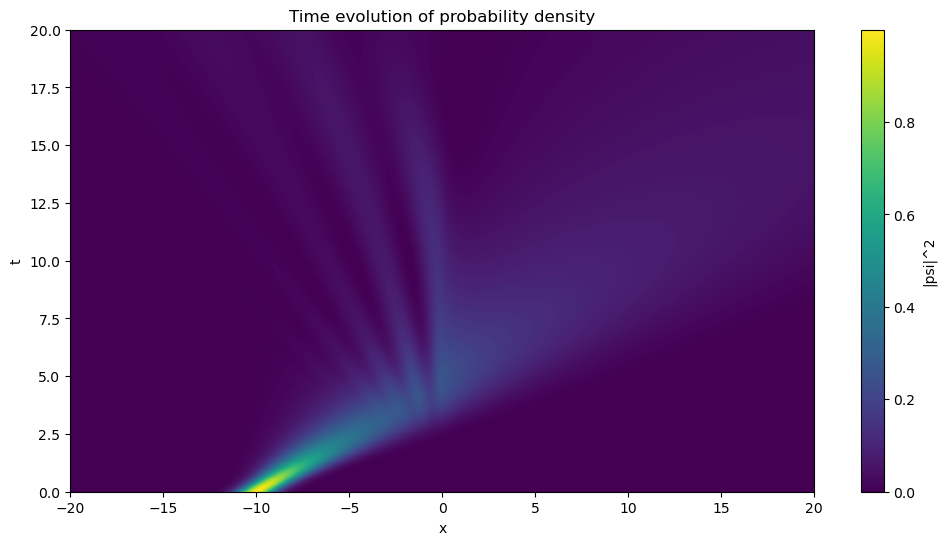

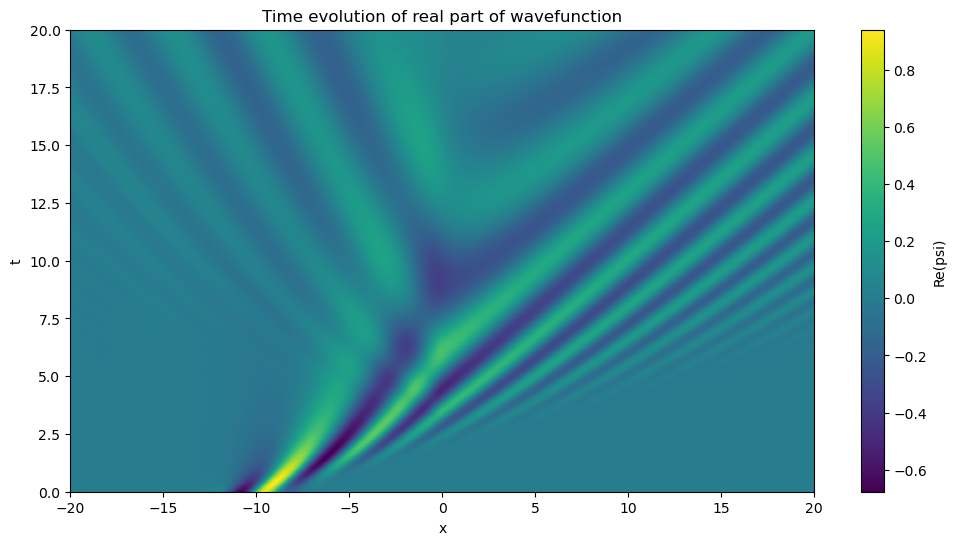

In [55]:
# Visualize the results
plt.figure(figsize=(12, 6))
x_ind = np.logical_and(x >= x_min_view, x <= x_max_view)
show_me = np.abs(psi_hist[::animate_every, x_ind])**2
plt.imshow(show_me, aspect='auto', extent=[x_min_view, x_max_view, 0, t_final], origin='lower')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar(label='|psi|^2')
plt.title('Time evolution of probability density')
plt.show()

plt.figure(figsize=(12, 6))
show_me = psi_hist.real[::animate_every, x_ind]
plt.imshow(show_me, aspect='auto', extent=[x_min_view, x_max_view, 0, t_final], origin='lower')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar(label='Re(psi)')
plt.title('Time evolution of real part of wavefunction')
plt.show()


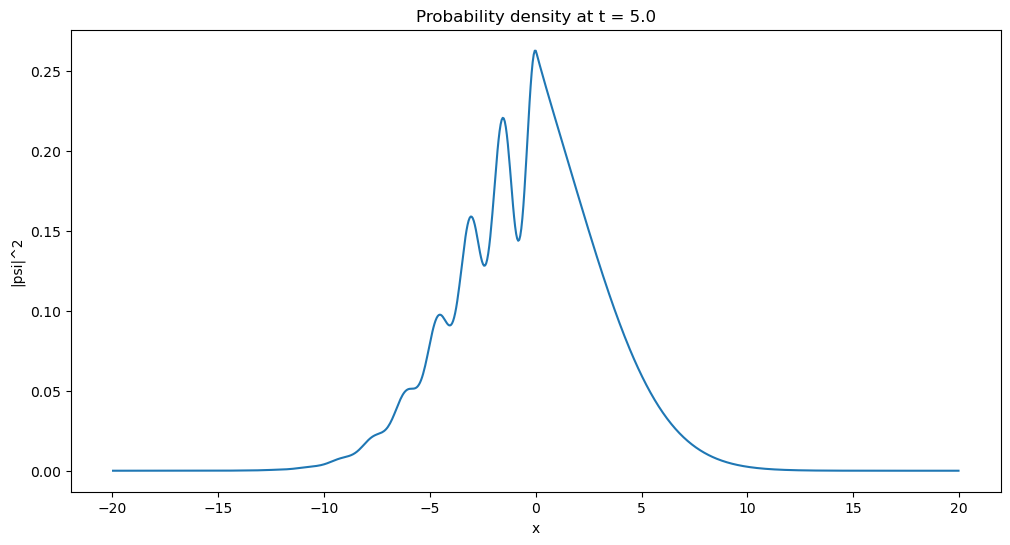

In [57]:
# Show a specific point in time
t = 5.0
t_index = int(t / dt)
plt.figure(figsize=(12, 6))
plt.plot(x[x_ind], np.abs(psi_hist[t_index, x_ind])**2)
plt.xlabel('x')
plt.ylabel('|psi|^2')
plt.title(f'Probability density at t = {t}')
plt.show()


In [58]:
# Make an animation

fig, ax = plt.subplots()
line, = ax.plot(x[x_ind], np.abs(psi_hist[0,x_ind])**2)
text = ax.text(0.02, 0.95, f't = {0:.2f}', transform=ax.transAxes)
ax.set_xlim(x_min_view, x_max_view)
ax.set_ylim(0, 1.5)
ax.set_xlabel('x')
ax.set_ylabel('|psi|^2')
ax.set_title('Time evolution of probability density')

def update(frame):
    line.set_ydata(np.abs(psi_hist[frame,x_ind])**2)
    text.set_text(f't = {t_range[frame]:.2f}')
    return line,

ani = FuncAnimation(fig, update, frames=range(0, n_steps, animate_every), blit=True)

print('Writing animation, this may take a while...')
ani.save('wavepacket.mp4', writer='ffmpeg', fps=30)
print('Done!')

# delete figure
plt.close(fig)

# show the animation
from IPython.display import Video
Video("wavepacket.mp4")


Writing animation, this may take a while...
Done!
